In [2]:
#lets do a exploratory analysis of the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#importing the data
df_companies = pd.read_csv(r'C:\Users\Gabriel Makhoul\Desktop\Ada Tech\git prova\S-P500-exploratory-financial-anallysis\sp500_companies.csv', delimiter = ',')
df_index = pd.read_csv(r'C:\Users\Gabriel Makhoul\Desktop\Ada Tech\git prova\S-P500-exploratory-financial-anallysis\sp500_index.csv', delimiter = ',')
df_stocks = pd.read_csv(r'C:\Users\Gabriel Makhoul\Desktop\Ada Tech\git prova\S-P500-exploratory-financial-anallysis\sp500_stocks.csv', delimiter = ',')

In [4]:
# on df_stocks we will take the mean of the high and low prices to get the average price of the stock
df_stocks['average_price'] = (df_stocks['High'] + df_stocks['Low'])/2

#lets count the number of days that this database has
x = df_stocks['Date'].nunique()

#now we will make a metris of avera price of the stock and the volume of the stock normalized by the number of days
df_stocks['price_volume'] = df_stocks['average_price']*df_stocks['Volume']/x

In [5]:
#lets pick the top 10 companies with the highest price_volume
df_stocks = df_stocks.sort_values(by = 'price_volume', ascending = True)

#grouping the data by company
df_stocks = df_stocks.groupby('Symbol').sum()

#lets pick the top 10 companies by the price_volume
df_stocks = df_stocks.sort_values(by = 'price_volume', ascending = False)

#pciking the top 10 companies
df_stocks_top10 = df_stocks.head(10)

C:\Users\Gabriel Makhoul\AppData\Local\Temp\ipykernel_6184\3854250567.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_stocks = df_stocks.groupby('Symbol').sum()


In [6]:
#now we join the data to get the company name
df_stocks_top10 = df_stocks_top10.join(df_companies.set_index('Symbol'), on = 'Symbol')

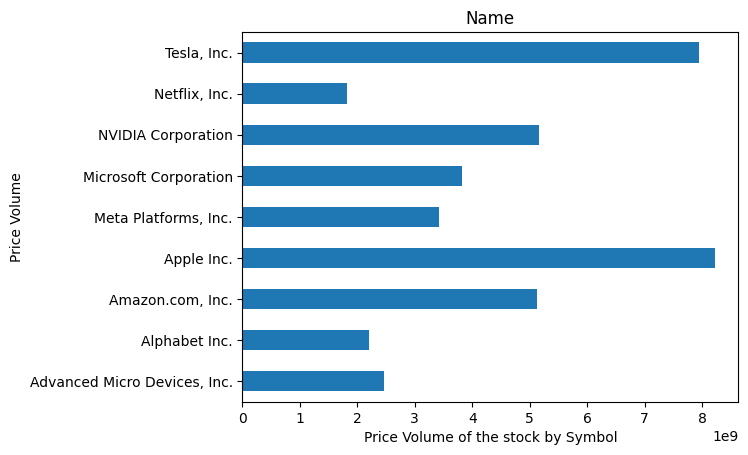

In [7]:
#now we graph the price volume of the stock by the Symbol of the company
df_stocks_top10.groupby('Shortname')['price_volume'].mean().plot(kind = 'barh')
plt.title('Name')
plt.xlabel('Price Volume of the stock by Symbol')
plt.ylabel('Price Volume')
plt.show()

In [8]:
#resset the df_stocks to the original data
df_stocks = pd.read_csv(r'C:\Users\Gabriel Makhoul\Desktop\Ada Tech\git prova\S-P500-exploratory-financial-anallysis\sp500_stocks.csv', delimiter = ',')

In [15]:
#lets filter the data for nvidia
nvidia_df = df_stocks[df_stocks['Symbol'] == 'NVDA']

# Set the 'Date' column as the index
nvidia_df['Date'] = pd.to_datetime(nvidia_df['Date'])
nvidia_df.set_index('Date', inplace=True)

C:\Users\Gabriel Makhoul\AppData\Local\Temp\ipykernel_6184\2086090.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvidia_df['Date'] = pd.to_datetime(nvidia_df['Date'])


c:\Users\Gabriel Makhoul\AppData\Local\Programs\Python\Python311\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


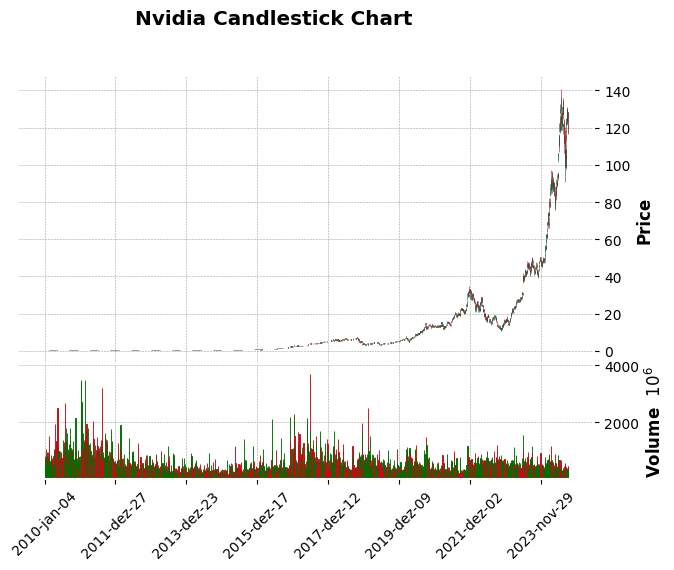

In [19]:
import mplfinance as mpf

#will plot the candle stick graph of the nvidia stock using the type='candle'
mpf.plot(nvidia_df, type='candle', volume=True, title='Nvidia Candlestick Chart', style='charles')

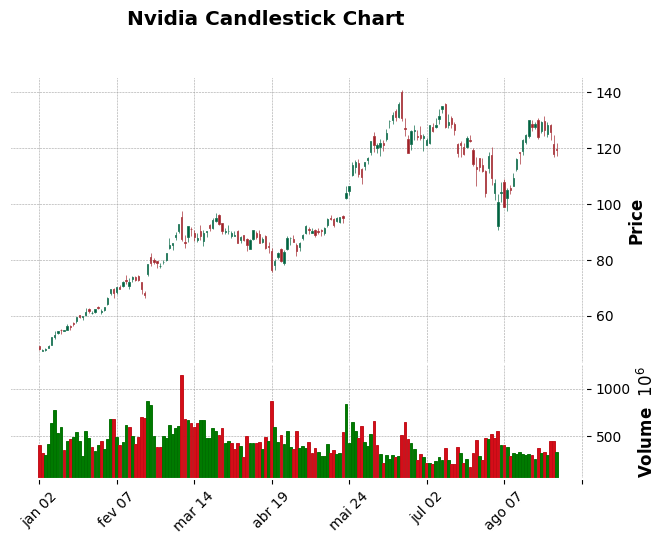

In [23]:
#now we fillter from 2017 onwards
nvidia_df = nvidia_df.loc['2024':]

#will plot the candle stick graph of the nvidia stock using the type='candle'
mpf.plot(nvidia_df, type='candle', volume=True, title='Nvidia Candlestick Chart', style='charles')